# Предобработка данных

In [404]:
import pandas as pd
import seaborn as sns

In [405]:
df = pd.read_csv(r"..\data\Lab2\DataSet2.csv")
pd.set_option('display.max_columns', None)
df.head(5)

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Movie Info,Genres,Critic Consensus,Content Rating,Directors,Authors,Actors,Original Release Date,Streaming Release Date,Production Company,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221","With World War I afoot, David Armstrong (Richa...","Action & Adventure, Classics",Subsequent war epics may have borrowed heavily...,PG-13,William Wellman,"Hope Loring, Louis D. Lighton","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",1927-08-12,2017-01-02,Unknown,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890","Vaudeville sisters ""Hank"" (Bessie Love) and Qu...","Musical & Performing Arts, Romance",The Broadway Melody is interesting as an examp...,NR,Harry Beaumont,"James Gleason, Norman Houston, Sarah Y. Mason","Anita Page, Bessie Love, Charles King, Jed Pro...",1929-02-01,2017-02-25,MGM Home Entertainment,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98


В датафрейме есть столбец "Unnamed: 0", который просто дублирует уже имеющуюся нумерацию, его можно удалить.

In [406]:
df.drop(["Unnamed: 0"], axis="columns", inplace=True)

Пустые значения в столбце Content Rating заполним NR - non rated.

Пустые значения в столбце Genres заполним значениями из столбца Movie Genre, так как они во многом пересекаются

In [407]:
df["Content Rating"].fillna("NR", inplace=True)
df["Genres"].fillna(df["Movie Genre"], inplace=True)

Заполним некоторые строковые столбцы значениями "Unknown".

In [408]:
columns = ["Authors", "Directors", "Actors", "Movie Info", "Critic Consensus", "Production Company"]

for column in columns:
    df[column].fillna("Unknown", inplace=True)

Рассмотрим тепловую карту, чтобы выявить корреляции для заполнения пропущенных числовых столбцов.

<Axes: >

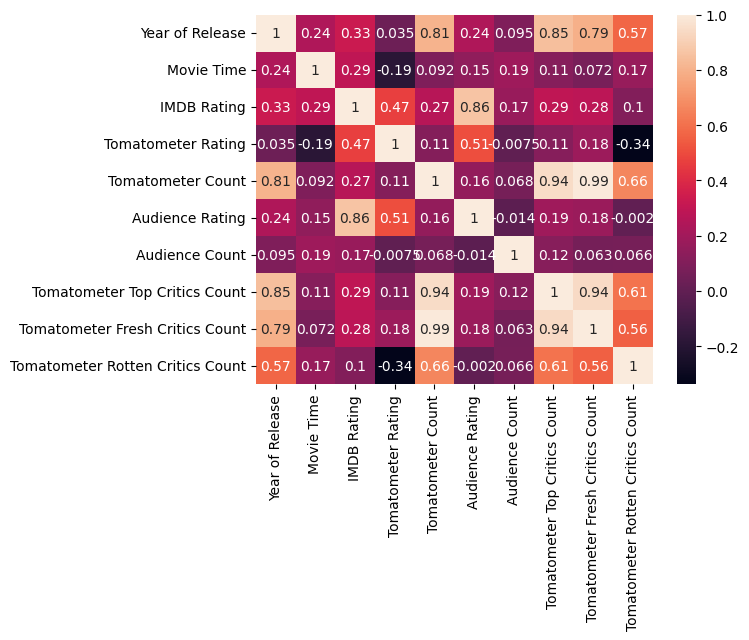

In [409]:
sns.heatmap(df.select_dtypes(include=["float", "int"]).corr(), annot=True)

Сильные корреляции:

-  IMDB Rating - Audience Rating,
- Year of Release - Tomatometer Count
- Tomatometer Count - Tomatometer Top Critics Count
- Tomatometer Count - Tomatometer Fresh Critics Count
- Tomatometer Count - Tomatometer Rotten Critics Count (Тут корреляция не очень сильная, но по-другому его не заполнить)


Сильная корреляция наблюдается между IMDB Rating и Audience Rating. Значит, основываясь на IMDB можно заполнить Audience Rating c помощью пропорции средних.

In [410]:
mean_imdb = df["IMDB Rating"].mean()
mean_audience = df["Audience Rating"].mean()
proportion = mean_audience / mean_imdb
df["Audience Rating"].fillna((df["IMDB Rating"] * proportion).round(2), inplace=True)

Год выпуска сильно коррелирует с количеством оценок tomatometer, заполним этот столбец c помощью пропорции.

In [411]:
mean_year = df["Year of Release"].median()
mean_tomato_count = df["Tomatometer Count"].mean()
proportion = mean_tomato_count / mean_year

df["Tomatometer Count"].fillna((df["Year of Release"] * proportion).round(), inplace=True)

Tomatometer Count сильно коррелирует с Tomatomenet Fresh Critics Count и Tomatometer Top Critics Count. Можем заполнить эти столбцы.

In [412]:
mean_fresh_count = df["Tomatometer Fresh Critics Count"].mean()
mean_top_count = df["Tomatometer Top Critics Count"].mean()
mean_rotten_count = df["Tomatometer Rotten Critics Count"].mean()

# Пропорции
p_tcount_fresh = mean_fresh_count / mean_tomato_count
p_tcount_top = mean_top_count / mean_tomato_count
p_tcount_rotten = mean_rotten_count / mean_tomato_count

df["Tomatometer Fresh Critics Count"].fillna((df["Tomatometer Count"] * p_tcount_fresh).round(), inplace=True)
df["Tomatometer Top Critics Count"].fillna((df["Tomatometer Count"] * p_tcount_top).round(), inplace=True)
df["Tomatometer Rotten Critics Count"].fillna((df["Tomatometer Count"] * p_tcount_rotten).round(), inplace=True)
df

,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Movie Info,Genres,Critic Consensus,Content Rating,Directors,Authors,Actors,Original Release Date,Streaming Release Date,Production Company,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221","With World War I afoot, David Armstrong (Richa...","Action & Adventure, Classics",Subsequent war epics may have borrowed heavily...,PG-13,William Wellman,"Hope Loring, Louis D. Lighton","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",1927-08-12,2017-01-02,Unknown,Certified-Fresh,93.0,46.0,Upright,78.00,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",Unknown,"Drama,Romance",Unknown,NR,Unknown,Unknown,Unknown,NaN,NaN,Unknown,NaN,NaN,108.0,NaN,83.84,NaN,21.0,96.0,12.0,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",Unknown,"Crime,Drama,Film-Noir",Unknown,NR,Unknown,Unknown,Unknown,NaN,NaN,Unknown,NaN,NaN,108.0,NaN,72.95,NaN,21.0,96.0,12.0,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890","Vaudeville sisters ""Hank"" (Bessie Love) and Qu...","Musical & Performing Arts, Romance",The Broadway Melody is interesting as an examp...,NR,Harry Beaumont,"James Gleason, Norman Houston, Sarah Y. Mason","Anita Page, Bessie Love, Charles King, Jed Pro...",1929-02-01,2017-02-25,MGM Home Entertainment,Rotten,33.0,24.0,Spilled,21.00,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,Unknown,"Action,Crime,Romance",Unknown,NR,Unknown,Unknown,Unknown,NaN,NaN,Unknown,NaN,NaN,108.0,NaN,63.15,NaN,21.0,96.0,12.0,609887c2-877c-43a4-b88c-e40e31096a98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Mank,2020,"Ceán Chaffin, Eric Roth, and Douglas Urbanski",Nominee,2020,131,"Biography,Comedy,Drama",6.9,"65,380",Unknown,"Biography,Comedy,Drama",Unknown,NR,Unknown,Unknown,Unknown,NaN,NaN,Unknown,NaN,NaN,113.0,NaN,75.13,NaN,22.0,101.0,13.0,47d4ae4f-e782-4cd9-9508-4a07302b1c1a
567,Minari,2020,Christina Oh,Nominee,2020,115,Drama,7.5,"57,976",Unknown,Drama,Unknown,NR,Unknown,Unknown,Unknown,NaN,NaN,Unknown,NaN,NaN,113.0,NaN,81.66,NaN,22.0,101.0,13.0,7262b3a8-214d-4205-985c-70e0860f3236
568,Promising Young Woman,2020,"Ben Browning, Ashley Fox, Emerald Fennell, and...",Nominee,2020,113,"Crime,Drama,Thriller",7.5,"122,269",Unknown,"Crime,Drama,Thriller",Unknown,NR,Unknown,Unknown,Unknown,NaN,NaN,Unknown,NaN,NaN,113.0,NaN,81.66,NaN,22.0,101.0,13.0,d64c669b-7a73-496a-bddb-19cb09264371
569,Sound of Metal,2020,Bert Hamelinck and Sacha Ben Harroche,Nominee,2019,120,"Drama,Music",7.8,"102,807",Unknown,"Drama,Music",Unknown,NR,Unknown,Unknown,Unknown,NaN,NaN,Unknown,NaN,NaN,113.0,NaN,84.93,NaN,22.0,101.0,13.0,647357e9-c067-46bd-aaeb-24d4344ec124


Выясним, какая градация у столбца Audience status

In [413]:
pd.pivot_table(df, index=["Audience Status"], values=["Audience Rating"], aggfunc=("min"))

,Audience Rating
Audience Status,
Spilled,21.0
Upright,60.0


Когда рейтинг аудитории меньше 60 - будем ставить статус Spilled, когда больше или равен - Upright

In [414]:
df.loc[df["Audience Rating"] < 60, "Audience Status"] = df.loc[df["Audience Rating"] < 60, "Audience Status"].fillna("Spilled")
df.loc[df["Audience Rating"] >= 60, "Audience Status"] = df.loc[df["Audience Rating"] >= 60, "Audience Status"].fillna("Upright")


Заполним Tomatometer Status на основе Audience Status. Если статус аудитории - Spilled, то статус томатометра, скорее всего, будет Rotten. Если статус аудитории - Upright, то статус томатометра будет, по крайней мере, Fresh, но не Sertified-Fresh, так как фильм с незаполненными полями, вероятно, не оценивался критиками.

In [415]:
df.loc[df["Audience Status"] == "Spilled", "Tomatometer Status"] = df.loc[df["Audience Status"] == "Spilled", "Tomatometer Status"].fillna("Rotten")
df.loc[df["Audience Status"] == "Upright", "Tomatometer Status"] = df.loc[df["Audience Status"] == "Upright", "Tomatometer Status"].fillna("Fresh")

Заполним дату релиза годом релиза + 6 месяцев и 15 дней (середина года)

In [416]:
df["Original Release Date"].fillna(df["Year of Release"].astype(str) + "-06" + "-15", inplace=True)


Оставшиеся столбцы (Streaming Release Date, Tomatometer Rating, Audience Count) заполним выбросами, так как они слабо коррелируют с другими столбцами.

In [417]:
df["Streaming Release Date"].fillna("2050-06-15", inplace=True)
df["Tomatometer Rating"].fillna(0, inplace=True)
df["Audience Count"].fillna(0, inplace=True)

В столбце Oscar Year уберём число, стоящее после /.

In [418]:
df["Oscar Year"] = df["Oscar Year"].str[:4]

Обработаем столбец Award. Nominee - 0, Winner - 1

In [419]:
df["Award"].replace("Nominee", 0, inplace=True)
df["Award"].replace("Winner", 1, inplace=True)

Все пропуски заполнены, поправим типы данных.

In [420]:
df.dtypes

Film                                 object
Oscar Year                           object
Film Studio/Producer(s)              object
Award                                 int64
Year of Release                       int64
Movie Time                            int64
Movie Genre                          object
IMDB Rating                         float64
IMDB Votes                           object
Movie Info                           object
Genres                               object
Critic Consensus                     object
Content Rating                       object
Directors                            object
Authors                              object
Actors                               object
Original Release Date                object
Streaming Release Date               object
Production Company                   object
Tomatometer Status                   object
Tomatometer Rating                  float64
Tomatometer Count                   float64
Audience Status                 

In [421]:
df["Oscar Year"] = df["Oscar Year"].astype(int)
df["IMDB Votes"] = df["IMDB Votes"].str.replace(",", "").astype(int)
df["Award"] = df["Award"].astype(bool)
df["Original Release Date"] = pd.to_datetime(df["Original Release Date"], format="ISO8601")
df["Streaming Release Date"] = pd.to_datetime(df["Streaming Release Date"], format="ISO8601")
df["Tomatometer Count"] = df["Tomatometer Count"].astype(int)
df["Audience Count"] = df["Audience Count"].astype(int)
df["Tomatometer Top Critics Count"] = df["Tomatometer Top Critics Count"].astype(int)
df["Tomatometer Fresh Critics Count"] = df["Tomatometer Fresh Critics Count"].astype(int)
df["Tomatometer Rotten Critics Count"] = df["Tomatometer Rotten Critics Count"].astype(int)

In [422]:
df.dtypes

Film                                        object
Oscar Year                                   int32
Film Studio/Producer(s)                     object
Award                                         bool
Year of Release                              int64
Movie Time                                   int64
Movie Genre                                 object
IMDB Rating                                float64
IMDB Votes                                   int32
Movie Info                                  object
Genres                                      object
Critic Consensus                            object
Content Rating                              object
Directors                                   object
Authors                                     object
Actors                                      object
Original Release Date               datetime64[ns]
Streaming Release Date              datetime64[ns]
Production Company                          object
Tomatometer Status             

# А теперь EDA!

## Гистограммы с выбросами

Рассмотрим гистограммы рейтингов IMDB и Audience, Year of Release, Tomatometer Count, IMDB Votes

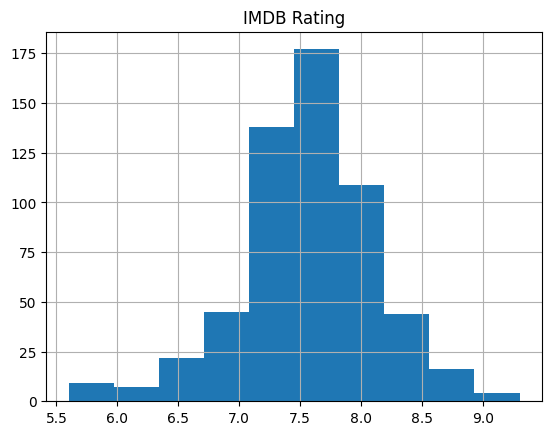

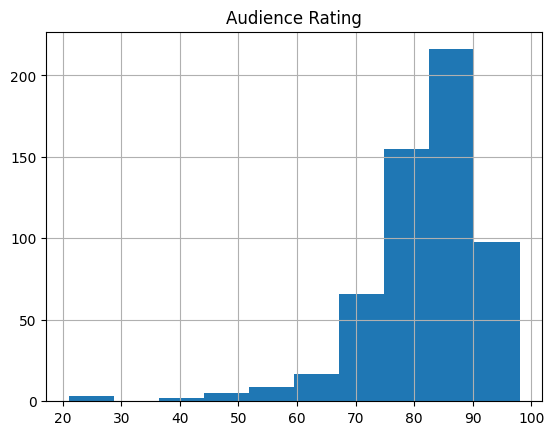

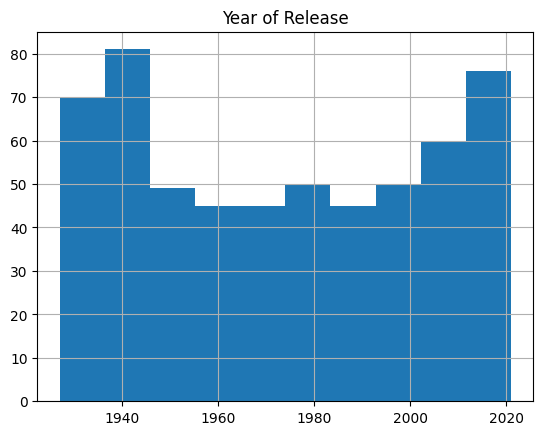

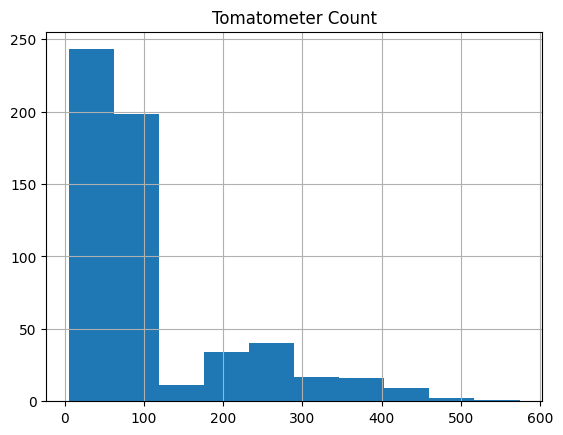

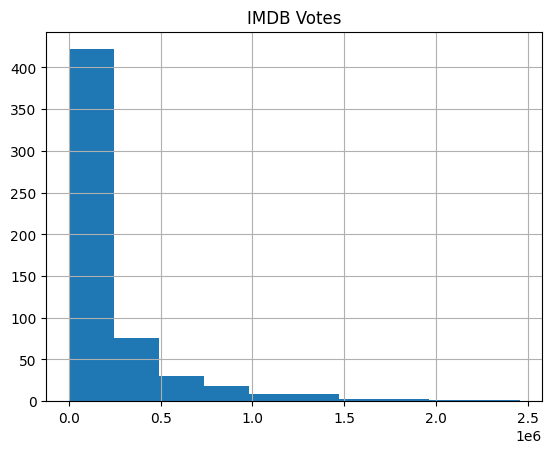

In [423]:
columns = ["IMDB Rating", "Audience Rating", "Year of Release", "Tomatometer Count", "IMDB Votes"]
for column in columns:
    df.hist(column)

Заключение:

- Выбросы затрудняют чтение данных в столбцах Tomatometer Count и IMDB Votes.
- График Audience Rating смещён вправо.

## Обработка выбросов

In [424]:
outlier = df[["Tomatometer Count", "IMDB Votes"]]
outlier

,Tomatometer Count,IMDB Votes
0,46,12221
1,108,3439
2,108,1257
3,24,6890
4,108,765
...,...,...
566,113,65380
567,113,57976
568,113,122269
569,113,102807


Определим 1 и 3 квартили.

In [425]:
Q1 = outlier.quantile(0.25)
Q1

Tomatometer Count      33.0
IMDB Votes           9660.5
Name: 0.25, dtype: float64

In [426]:
Q3 = outlier.quantile(0.75)
Q3

Tomatometer Count       113.0
IMDB Votes           259429.0
Name: 0.75, dtype: float64

Рассчитаем межквартильный размах и создадим новый датафрейм без выбросов, который включает 95% наблюдений

In [427]:
IQR = Q3 - Q1

# ~ значит взять то, что не удовлетворяет условию
filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) | (outlier > (Q3 + 1.5 * IQR))).any(axis=1)]  # Вопрос!!! Зачем надо .any(axis=1)
filtered

,Tomatometer Count,IMDB Votes
0,46,12221
1,108,3439
2,108,1257
3,24,6890
4,108,765
...,...,...
566,113,65380
567,113,57976
568,113,122269
569,113,102807


Скопируем индексы данных без выбросов.

In [428]:
index_list = filtered.index.values

Cоздадим новый датафрейм без выбросов.

In [429]:
df_filt = df[df.index.isin(index_list)]

## Гистограммы без выбросов

Рассмотрим гистограммы ещё раз.

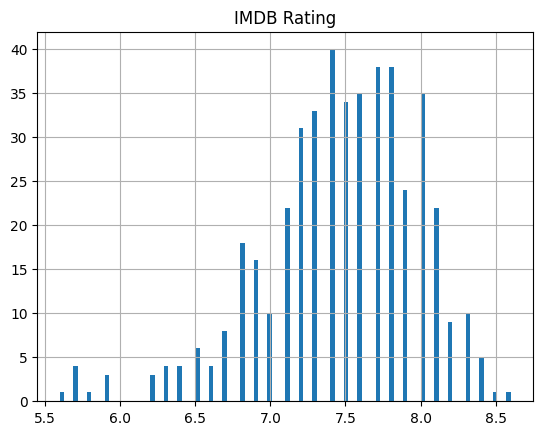

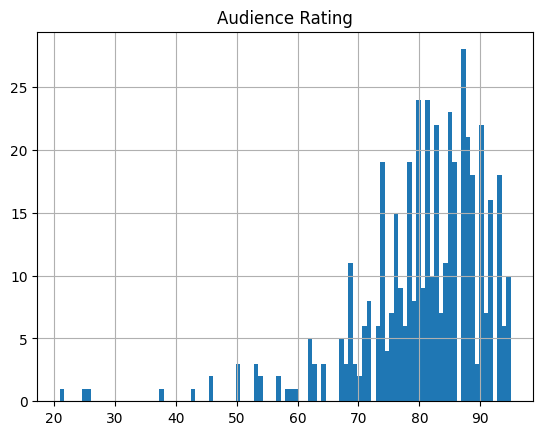

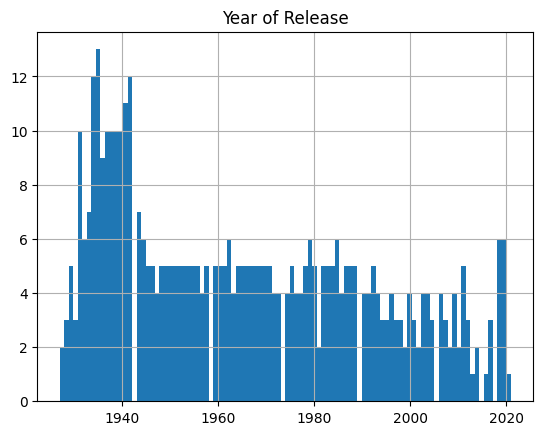

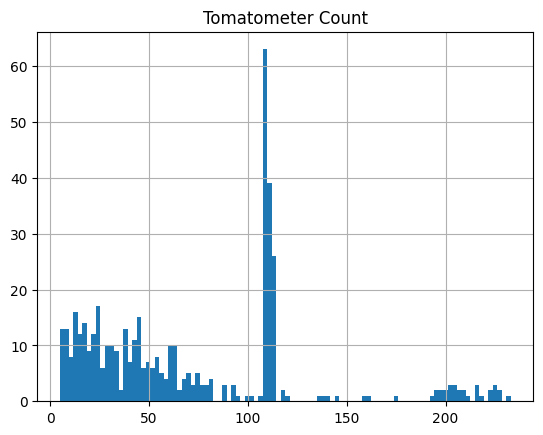

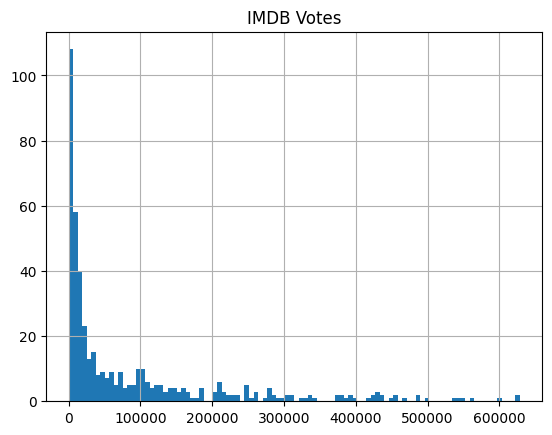

In [430]:
for column in columns:
    df_filt.hist(column, bins=100)

Некоторые значения в Tomatometer Count встречаются слишком часто, скорее всего, это из-за заполнения этого столбца на основе года релиза

## Scatter plot без выбросов

Рассмотрим графики scatter plot для получивших и не получивших оскар фильмов, где X и Y - рейтинги IMDB и Audience

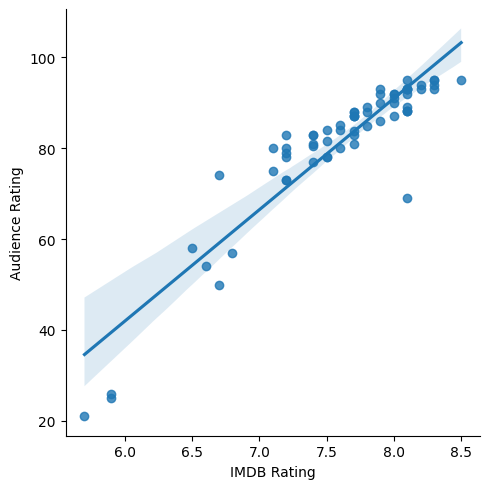

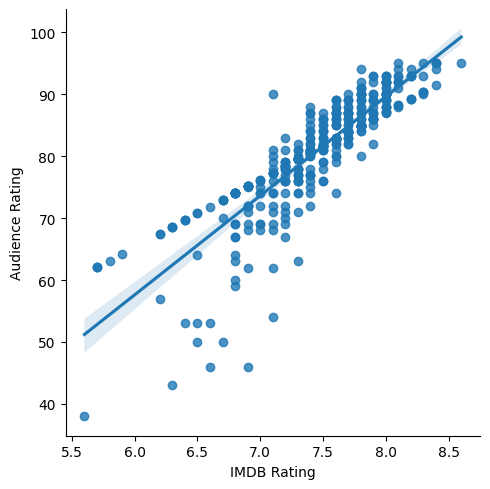

In [431]:
sns.lmplot(df_filt[df_filt["Award"] == True], x="IMDB Rating", y="Audience Rating")
sns.lmplot(df_filt[df_filt["Award"] == False], x="IMDB Rating", y="Audience Rating")

Эти графики показывают, что рейтинги IMDB и Audience сильно коррелируют, но едва ли влияют на получение оскара


## Boxplot без выбросов

Рассмотрим графики boxplot для тех же показателей.

<Axes: title={'center': 'Audience Rating'}, xlabel='Award'>

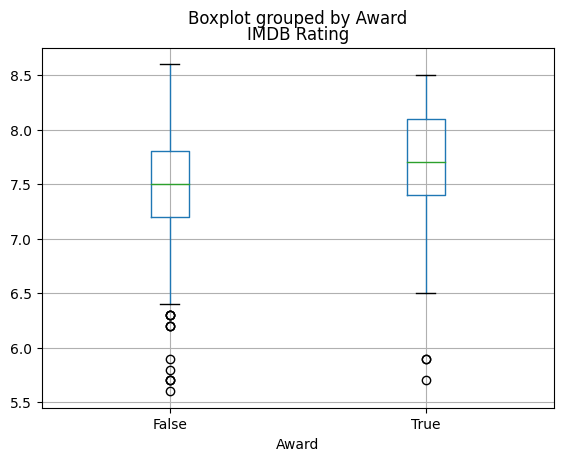

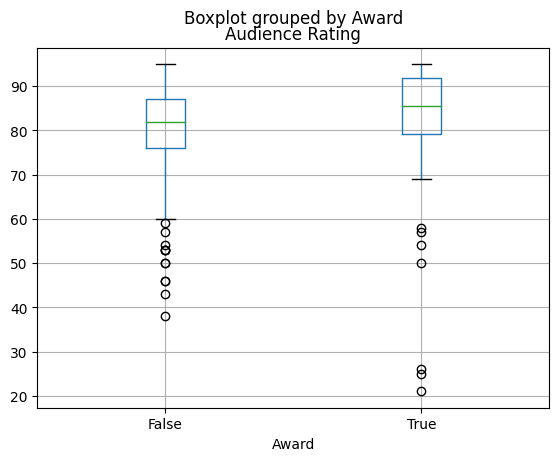

In [435]:
df_filt.boxplot(by="Award", column="IMDB Rating", grid=True)
df_filt.boxplot(by="Award", column="Audience Rating", grid=True)

По графикам boxplot видно небольшую взаимосвязь, у фильмов, получивших оскар, рейтинги IMDB и Audience чуть выше.